#### Importing libraries

In [1]:
import cv2,os

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from keras.utils import np_utils

#### Importing Dataset

In [5]:
data_path = "Documents/project/DATASET"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'test': 0, 'train': 1}
['test', 'train']
[0, 1]


In [6]:
data_path = 'Documents/project/DATASET/train'
classes_path = os.listdir(data_path)
classes = os.listdir(data_path)
print(classes)
label_classes = [i for i in range(len(classes))]
print(label_classes)

['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [7]:
data_path = 'Documents/project/DATASET'

In [8]:
label_classes_dict = dict(zip(classes,label_classes))

In [9]:
print(label_classes_dict)

{'0': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}


#### Converting into gray scale image

In [10]:
img_size=128
data = []
target = []
cnt = 0
minValue = 70
for category in categories:
    
    category_path=os.path.join(data_path,category)
    print(category_path)
    category_names=os.listdir(category_path)
    print(category_names)
    for classes in category_names:
        folder_path=os.path.join(data_path,category,classes)
        print(folder_path)
        img_names=os.listdir(folder_path)
        #print(img_names)
        for img_name in img_names:
            #print(img_name)
            img_path=os.path.join(folder_path,img_name)
            img=cv2.imread(img_path)
            
            try:
                gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
                blur = cv2.GaussianBlur(gray,(5,5),2)
                th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
                ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                #res=np.array(res)
                #print(type(res))
            #Converting the image into gray scale
                resized=cv2.resize(res,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
                data.append(resized)
                #print(data)
                target.append(label_classes_dict[classes])
            except Exception as e:
                print('Exception:',e)


Documents/project/DATASET\test
['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Documents/project/DATASET\test\0
Documents/project/DATASET\test\A
Documents/project/DATASET\test\B
Documents/project/DATASET\test\C
Documents/project/DATASET\test\D
Documents/project/DATASET\test\E
Documents/project/DATASET\test\F
Documents/project/DATASET\test\G
Documents/project/DATASET\test\H
Documents/project/DATASET\test\I
Documents/project/DATASET\test\J
Documents/project/DATASET\test\K
Documents/project/DATASET\test\L
Documents/project/DATASET\test\M
Documents/project/DATASET\test\N
Documents/project/DATASET\test\O
Documents/project/DATASET\test\P
Documents/project/DATASET\test\Q
Documents/project/DATASET\test\R
Documents/project/DATASET\test\S
Documents/project/DATASET\test\T
Documents/project/DATASET\test\U
Documents/project/DATASET\test\V
Documents/project/DATASET\test\W
Documents/project/DATASET\test\X
Document

In [11]:
datanp = np.array(data)

In [12]:
datanp.shape

(17113, 128, 128)

In [13]:
targetnp = np.array(target)

targetnp.shape

(17113,)

In [14]:
import numpy as np

data = np.array(data)/255.0
data = np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)

from keras.utils import np_utils

new_target = np_utils.to_categorical(target)

In [15]:
new_target.shape

(17113, 27)

In [16]:
data.shape

(17113, 128, 128, 1)

In [27]:
#np.save('data_img',data)
#np.save('target',new_target)

In [28]:
#data=np.load('data_img.npy')
#target=np.load('target.npy')

#### Splitting into train and test dataset

In [17]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

#### Building the model

In [18]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
sz = 128

#### Step 1 - Building the CNN
#### Initializing the CNN

In [19]:
classifier = Sequential()

#### First convolution layer and pooling

In [20]:
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#### Second convolution layer and pooling

In [21]:
classifier.add(Convolution2D(32, (3, 3), activation='relu'))

In [22]:
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#### Flattening the layers

In [23]:
classifier.add(Flatten())

In [24]:
# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax')) 

In [25]:
# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [26]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3686528   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

#### Training the model

In [27]:
from keras.callbacks import ModelCheckpoint

In [29]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=classifier.fit(train_data,train_target,shuffle=True,epochs=10,callbacks=[checkpoint],validation_split=0.3)

Epoch 1/10
300/300 [==============================] - 90s 299ms/step - loss: 0.1669 - accuracy: 0.9461 - val_loss: 0.0054 - val_accuracy: 0.9995
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/10
300/300 [==============================] - 90s 301ms/step - loss: 0.1511 - accuracy: 0.9517 - val_loss: 0.0041 - val_accuracy: 0.9993
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/10
300/300 [==============================] - 88s 293ms/step - loss: 0.1278 - accuracy: 0.9572 - val_loss: 0.0045 - val_accuracy: 0.9990
Epoch 4/10
300/300 [==============================] - 87s 290ms/step - loss: 0.1165 - accuracy: 0.9615 - val_loss: 0.0042 - val_accuracy: 0.9985
Epoch 5/10
300/300 [==============================] - 89s 296ms/step - loss: 0.1116 - accuracy: 0.9623 - val_loss: 0.0019 - val_accuracy: 0.9995
INFO:tensorflow:Assets written to: model-005.model\assets
Epoch 6/10
300/300 [==============================] - 86s 286ms/step - loss: 0.1000 - accuracy: 0.966

#### output of test data accuracy

In [30]:
print(classifier.evaluate(test_data,test_target))

107/107 [==============================] - 7s 63ms/step - loss: 0.0033 - accuracy: 0.9991
[0.0032837530598044395, 0.9991235733032227]


In [33]:
import matplotlib.pyplot as plt
import tensorflow as tf
import random

#### Testing some random test data images

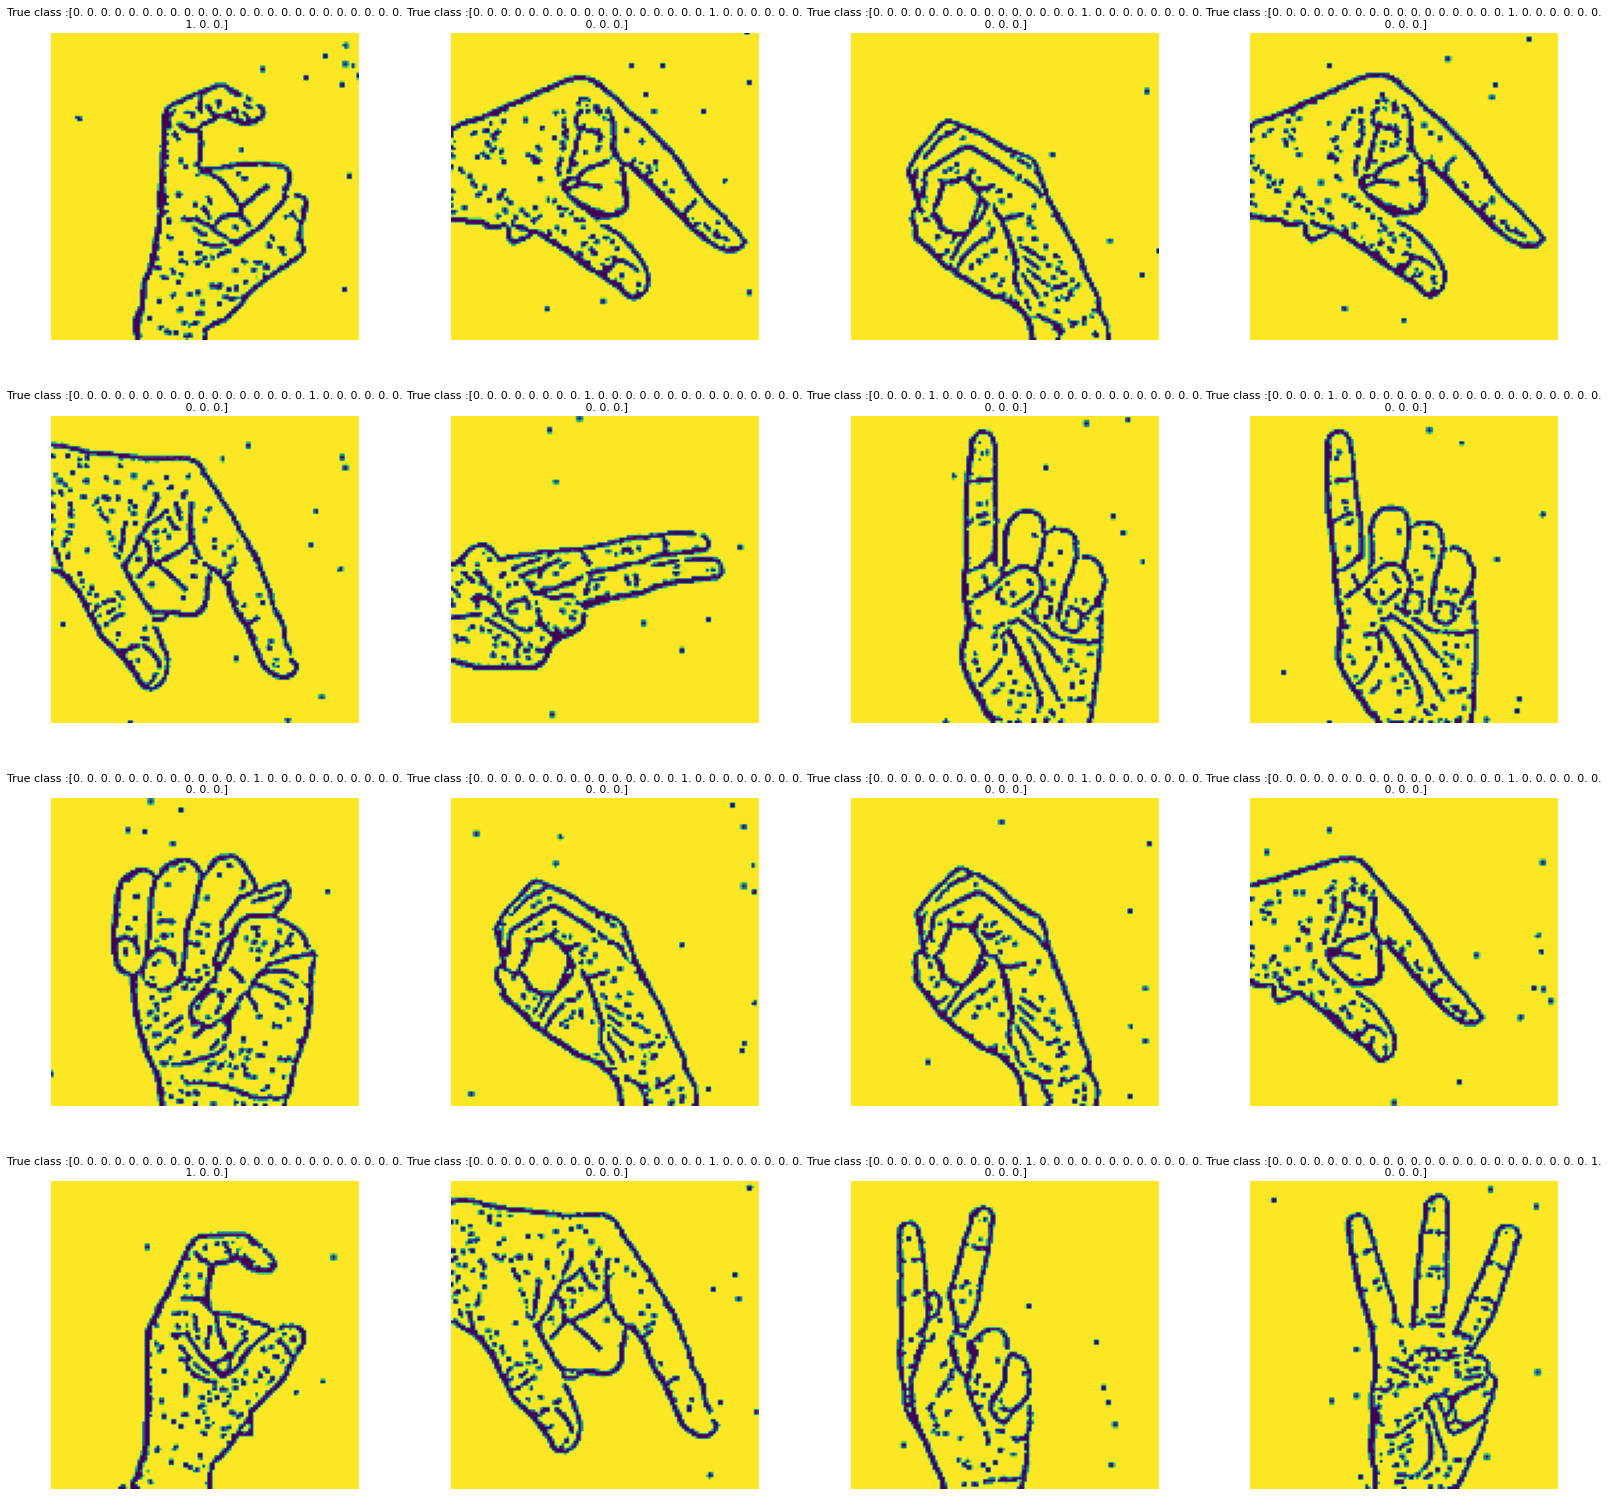

In [92]:
import random
l = 4
w= 4
fig , axes = plt.subplots(l ,w ,figsize = (27,27))
axes = axes.ravel()

n_test = len(test_target)

for i in range(0 , l*w):
  index = random.randint(0 , n_test-1)
  axes[i].imshow(tf.squeeze(test_data[index]))
  axes[i].set_title('True class :{}'.format(test_target[index]),fontsize = 11)
  axes[i].axis('off')

plt.subplots_adjust(wspace=0.3)

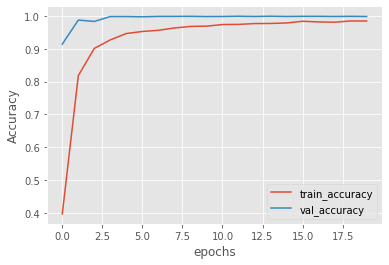

In [78]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show()

#### Saving the model 

In [36]:
#saving the model
print("[INFO] saving model...")
classifier.save('HGDmodel.h5')
print("Done !")

[INFO] saving model...
Done !


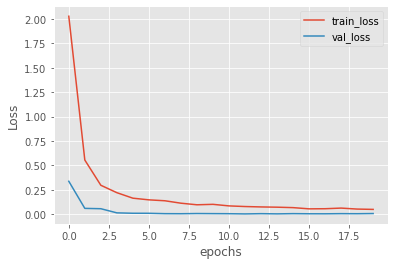

In [77]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show()

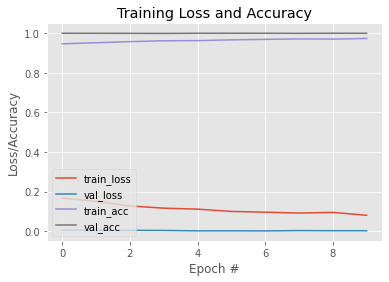

In [35]:
N = 10
H=history
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')